In [106]:
import os
import sys
sys.path.append("../")
import cv2
import torch
import matplotlib.pyplot as plt
import ultralytics

yolo = ultralytics.YOLO("models/best_so_far.pt")


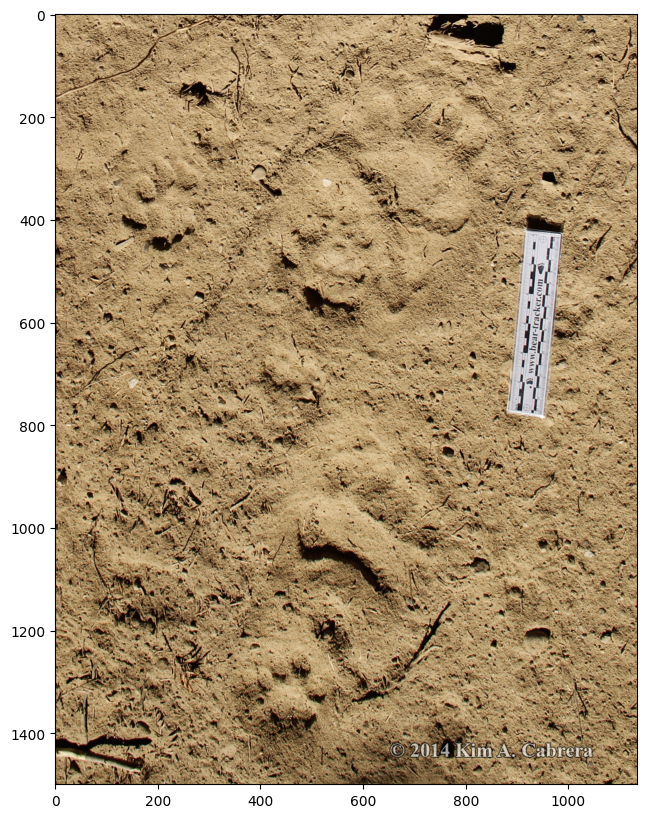

In [107]:
img_path = "../data/OpenAnimalTracks/raw_imgs/blackbear/1075954.jpg"

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [108]:
result = yolo.predict(img)
print(result)


0: 640x512 4 items, 2.1ms
Speed: 1.1ms preprocess, 2.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 512)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'item'}
obb: None
orig_img: array([[[209, 186, 136],
        [223, 193, 155],
        [221, 198, 156],
        ...,
        [170, 146, 108],
        [190, 172, 132],
        [186, 163, 122]],

       [[187, 157, 107],
        [190, 162, 112],
        [188, 167, 114],
        ...,
        [114,  88,  51],
        [140, 117,  75],
        [178, 151, 106]],

       [[184, 156, 109],
        [189, 160, 116],
        [190, 161, 117],
        ...,
        [121,  98,  66],
        [131, 103,  63],
        [175, 144,  98]],

       ...,

       [[ 58,  29,  13],
        [ 70,  31,  14],
        [105,  59,  36],
        ...,
        [177, 155, 108],
        [173, 151, 101],
        [168, 143,  89]],

       [[ 55,  41,  14],
    

In [109]:
bbox = []
for box in result:
    bbox.append(box.boxes.xyxy)

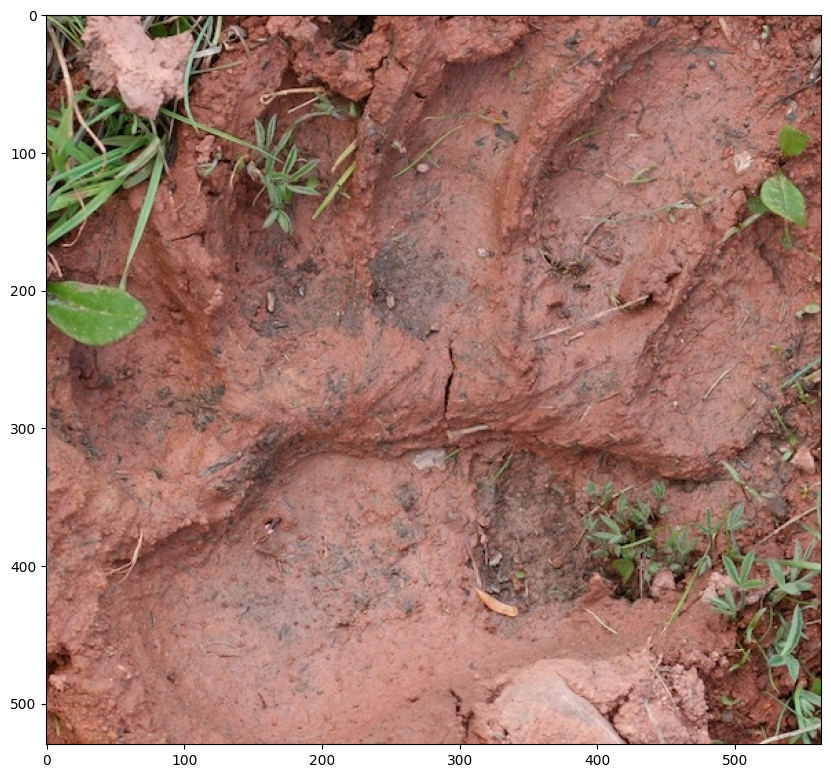

In [126]:
import cv2
import matplotlib.pyplot as plt

img_path = "../data/OpenAnimalTracks/cropped_imgs/train/black_bear/1196.jpg"

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [127]:
results = yolo.predict(img)



0: 608x640 1 item, 18.7ms
Speed: 8.3ms preprocess, 18.7ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 640)


In [128]:
def score_calculation(bbox, conf):
    bbox = bbox
    conf = conf
    area = (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])
    score = conf * area
    score = abs(score)
    return score




In [129]:
results_postprocess = []
for result in results[0].boxes:
    bbox = result.xyxy[0].cpu().numpy()
    conf = result.conf.cpu().numpy()
    score = conf * (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])
    results_postprocess.append({
        "bbox": bbox,
        "conf": conf,
        "score": score
    })
    


In [130]:
results_postprocess

[{'bbox': array([     25.874,      31.442,       543.1,      518.65], dtype=float32),
  'conf': array([    0.41555], dtype=float32),
  'score': array([ 1.0472e+05], dtype=float32)}]

In [131]:
for result in results_postprocess:
    bbox = result["bbox"]
    conf = result["conf"]
    score = score_calculation(bbox, conf)
    print(score)

[ 1.0472e+05]


In [132]:
results_postprocess

[{'bbox': array([     25.874,      31.442,       543.1,      518.65], dtype=float32),
  'conf': array([    0.41555], dtype=float32),
  'score': array([ 1.0472e+05], dtype=float32)}]

In [133]:
best = results_postprocess[2]

IndexError: list index out of range

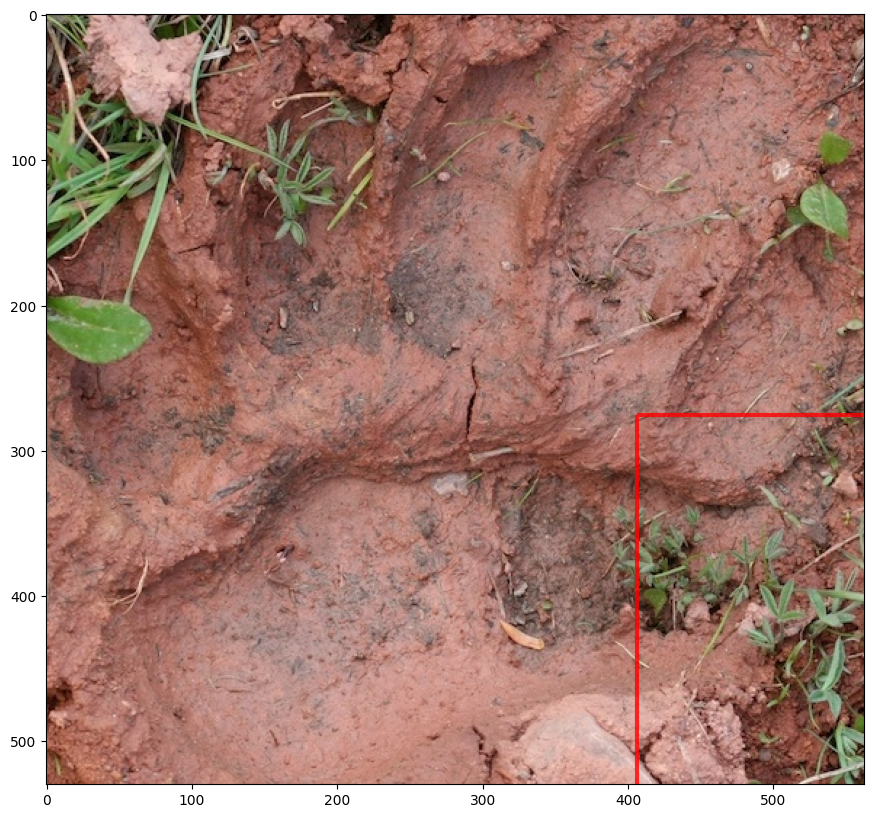

In [134]:
#draw bounding boxes on the image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a copy of the image for drawing
img_with_boxes = img.copy()

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.imshow(img_with_boxes)

# Draw each bounding box
box = best["bbox"]

rectangle = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=3, edgecolor='red', facecolor='none', alpha=0.8)
ax.add_patch(rectangle)





In [135]:
print(best["bbox"][0])

405.97873


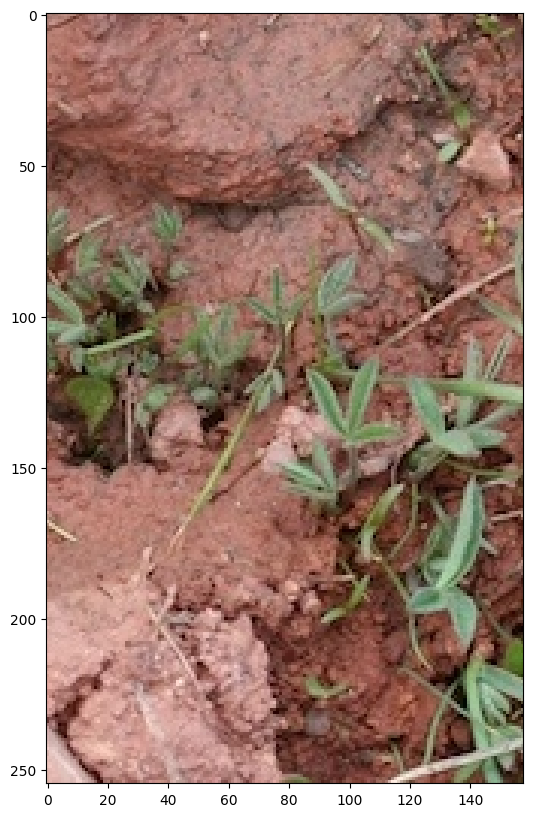

In [136]:
cropped_img = img[int(best["bbox"][1]):int(best["bbox"][3]), int(best["bbox"][0]):int(best["bbox"][2])]

plt.figure(figsize=(10, 10))
plt.imshow(cropped_img)
plt.show()